## Basic ipynb to start

In [1]:
%pip install -q datasets
%pip install -q pandas
%pip install -q wordcloud
%pip install -q contractions
%pip install -q seaborn
%pip install -q transformers


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset,Dataset
import pandas as pd
import seaborn as sns
import re
from transformers import AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 9 files to the new cache system


  0%|          | 0/9 [00:00<?, ?it/s]

In [3]:
# Import packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import contractions
from datasets import load_dataset_builder, load_dataset, DatasetDict
import pandas as pd
pd.set_option('display.max_colwidth', 400)

In [25]:
# load our data
dataset = load_dataset("ag_news")
print(dataset)
# get the index to label mapping
labels = dataset["train"].features["label"].names
labels

Using custom data configuration default
Reusing dataset ag_news (/Users/kushalramaiya/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


['World', 'Sports', 'Business', 'Sci/Tech']

In [26]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


In [31]:
def clean_text(batch):
    batch["text"] = re.sub("&lt;","",batch["text"])
    batch["text"] = re.sub("br&gt;","",batch["text"])
    #Replacing Quotes with quotation mark
    batch["text"] = re.sub("quot;", "\"", batch["text"])
    #Replacing #39; with apostrophe
    batch["text"] = re.sub(" #39;","\'",batch["text"])
    #Replacing \ before the dollar to only dollar
    batch["text"] = re.sub("\\\\","",batch["text"])
    #HTML Code to normal text
    batch["text"] = re.sub("#36;","$",batch["text"])
    batch["text"] = re.sub("#225;","a",batch["text"])
    return batch

In [28]:
def add_prefix(example):
    example["text"] = 'My sentence: ' + example["text"]
    return example

In [32]:
updated_dataset = dataset["train"].map(clean_text)


  0%|          | 0/120000 [00:00<?, ?ex/s]

{'text': ["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindlingband of ultra-cynics, are seeing green again.",
  'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,which has a reputation for making well-timed and occasionallycontroversial plays in the defense industry, has quietly placedits bets on another part of the market.',
  "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums.",
  'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil exportflows from the main pipeline in southern Iraq afterintelligence showed a rebel militia could strikeinfrastructure, an oil official said on Saturday.',
  'Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP

In [33]:
updated_dataset[:5]

{'text': ["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindlingband of ultra-cynics, are seeing green again.",
  'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,which has a reputation for making well-timed and occasionallycontroversial plays in the defense industry, has quietly placedits bets on another part of the market.',
  "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums.",
  'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil exportflows from the main pipeline in southern Iraq afterintelligence showed a rebel militia could strikeinfrastructure, an oil official said on Saturday.',
  'Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP

In [23]:
updated_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

In [34]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [35]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [36]:
print(tokenize(updated_dataset[:2]))


{'input_ids': [[101, 2813, 2358, 1012, 6468, 15020, 2067, 2046, 1996, 2304, 1006, 26665, 1007, 26665, 1011, 2460, 1011, 19041, 1010, 2813, 2395, 1005, 1055, 1040, 11101, 2989, 12733, 1997, 11087, 1011, 22330, 8713, 2015, 1010, 2024, 3773, 2665, 2153, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 18431, 2571, 3504, 2646, 3293, 13395, 1006, 26665, 1007, 26665, 1011, 2797, 5211, 3813, 18431, 2571, 2177, 1010, 2029, 2038, 1037, 5891, 2005, 2437, 2092, 1011, 22313, 1998, 5681, 8663, 13181, 14028, 4818, 3248, 1999, 1996, 3639, 3068, 1010, 2038, 5168, 2872, 12762, 29475, 2006, 2178, 2112, 1997, 1996, 3006, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [37]:
news_encoded = updated_dataset.map(tokenize, batched=True, batch_size=None)


  0%|          | 0/1 [00:00<?, ?ba/s]

In [38]:
news_encoded

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 120000
})

In [40]:
# hide_output
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = "cpu"
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [89]:
news_df = pd.DataFrame(dataset["train"])
news_df.head()

,text,label
0,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2
1,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2
2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2
3,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2
4,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2


In [127]:
true_label = pd.DataFrame(news_df.label)
news_text_df = pd.DataFrame(news_df.text)
news_text_df.head()
print(news_text_df.loc[[37448]])

                                                                                                                                                                                                                                                                                           text
37448  Stocks Drop on \$49 Oil, Slowing Economy  NEW YORK (Reuters) - U.S. blue-chip stocks fell  on  Thursday to nearly a five-week low as crude oil touched \$49 a  barrel, close to the record set last month, and a key gauge of  future economic activity fell for a third straight month.


In [181]:
def clean_text(text):
    text = re.sub("&lt;","",text)
    text = re.sub("br&gt;","",text)
    #Replacing Quotes with quotation mark
    text = re.sub("quot;", "\"", text)
    #Replacing #39; with apostrophe
    text = re.sub(" #39;","\'",text)
    #Replacing \ before the dollar to only dollar
    text = re.sub("\\\\","",text)
    #HTML Code to normal text
    text = re.sub("#36;","$",text)
    text = re.sub("#225;","a",text)
    
    return text

In [183]:
news_df['clean_text'] = news_df['text'].apply(clean_text)
news_df.sample(5) # 24717


,text,label,clean_text
42677,"Officials open training camp Sunday NEW YORK -- NBA referees have entered into a five-year collective bargaining agreement with the league, removing the possibility of having replacement officials work the upcoming season.",1,"Officials open training camp Sunday NEW YORK -- NBA referees have entered into a five-year collective bargaining agreement with the league, removing the possibility of having replacement officials work the upcoming season."
18993,NCAA Football: LSU Tigers Edge out Oregon State Beavers 22-21 US college football #39;s fourth-ranked Louisiana State University Tigers eked out a 22-21 overtime victory over the unranked Oregon State Beavers late Saturday on the first full day of action.,1,NCAA Football: LSU Tigers Edge out Oregon State Beavers 22-21 US college football's fourth-ranked Louisiana State University Tigers eked out a 22-21 overtime victory over the unranked Oregon State Beavers late Saturday on the first full day of action.
47242,"American League Game Summary - New York at Toronto Matsui had made 1,251 consecutive starts with the Yomiuri Giants in his native Japan and has played in all 322 games with the Yankees over the last two seasons...Bush #39;s previous long outing was an eight-inning stint against Oakland on July 20, in which he",1,"American League Game Summary - New York at Toronto Matsui had made 1,251 consecutive starts with the Yomiuri Giants in his native Japan and has played in all 322 games with the Yankees over the last two seasons...Bush's previous long outing was an eight-inning stint against Oakland on July 20, in which he"
79348,"Copper Prices Fall Amid Concern of Slowing Consumption in China Copper prices in New York fell for the second session in three on signs of slowing demand from manufacturers in China, the world #39;s biggest buyer of the metal.",2,"Copper Prices Fall Amid Concern of Slowing Consumption in China Copper prices in New York fell for the second session in three on signs of slowing demand from manufacturers in China, the world's biggest buyer of the metal."
97056,NBA Officials Halt Pistons-Pacers Game Following Brawl NBA officials stopped a game between the Indiana Pacers and the Detroit Pistons with about 45 seconds left to play late Friday after a brawl broke out between players and fans in Detroit.,1,NBA Officials Halt Pistons-Pacers Game Following Brawl NBA officials stopped a game between the Indiana Pacers and the Detroit Pistons with about 45 seconds left to play late Friday after a brawl broke out between players and fans in Detroit.


In [173]:
text = news_text_df.loc[24717,'text']
print(text)


US Air Pilots Agree to New Talks (Reuters) Reuters - US Airways and its pilots union saidon Saturday that they were willing to resume talks over a  $295million package of concessions, as time ran short for thecompany to strike giveback deals with its labor groups andavert another trip into bankruptcy.


In [157]:
text = re.sub("&lt;br&gt","",text)
print(text)

Stocks Drop on  $49 Oil, Slowing Economy  NEW YORK (Reuters) - U.S. blue-chip stocks fell  on  Thursday to nearly a five-week low as crude oil touched  $49 a  barrel, close to the record set last month, and a key gauge of  future economic activity fell for a third straight month.


## Define our Labeling Functions

In [ ]:
from snorkel.labeling import labeling_function,PandasLFApplier,LFAnalysis


## Ways to create func
- Keyword Lookup
- Pattern Lookup/Regex
- 3rd Party Library:spacy
- Suggestions...

In [ ]:
# Constants for our labels
ABSTAIN = -1
WORLD = 0
SPORTS = 1
BUSINESS=2
SCITECH=3

In [ ]:
## Keyword Lookup
@labeling_function()
def lf_sad_keyword_lookup(x):
  keywords = ["sad","low"]
  return SADNESS if any(word in x.text.lower() for word in keywords) else ABSTAIN

In [ ]:
## Pattern Lookup/Regex Fxn
import re
@labeling_function()
def lf_regex_contains_sad(x):
  return SADNESS if re.search(r"sad*.*",x.text.lower(),flags=re.I) else ABSTAIN

In [ ]:
### Pattern Lookup/Regex Fxn
@labeling_function()
def lf_regex_contains_happy(x):
  return JOY if re.search(r"happ*.*",x.text.lower(),flags=re.I) else ABSTAIN

In [ ]:
### Apply Fxn
lfs = [lf_sad_keyword_lookup,lf_regex_contains_sad,lf_regex_contains_happy]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=emotion_text_df)

In [ ]:
L_train

In [ ]:
### Evaluate the Performance
LFAnalysis(L=L_train,lfs=lfs).lf_summary()

#### We need to ensemble the votes and for this we can use MajorityLabel Voter by snorkel

In [ ]:
# LabelModel
#from snorkel.labeling.model import MajorityLabelVoter,LabelModel

In [ ]:
def draw_wordcloud(dataframe):
    comment_words = ''
    stopwords = set(STOPWORDS)
    # Adding Stopwords feel and feeling as they appear the most
    for val in dataframe.text:  
        # typecaste each val to string
        val = str(val)
        # Correcting strings like im to i am, didnt to did not etc... 
        #val = contractions.fix(val)
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()
    return comment_words

In [ ]:
comment_words = draw_wordcloud(news_text_df)


In [ ]:
set_comment_words = set(comment_words)

len(set_comment_words)
print(" quot " in set_comment_words)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [186]:
world = news_df[news_df.label == 0]
world.head()
    

,text,label,clean_text
492,Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.,0,Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out earlyand in large numbers on Sunday to vote in a historic referendumthat will either remove left-wing President Hugo Chavez fromoffice or give him a new mandate to govern for the next twoyears.
493,"S.Koreans Clash with Police on Iraq Troop Dispatch (Reuters) Reuters - South Korean police used water cannon in\central Seoul Sunday to disperse at least 7,000 protesters\urging the government to reverse a controversial decision to\send more troops to Iraq.",0,"S.Koreans Clash with Police on Iraq Troop Dispatch (Reuters) Reuters - South Korean police used water cannon incentral Seoul Sunday to disperse at least 7,000 protestersurging the government to reverse a controversial decision tosend more troops to Iraq."
494,"Palestinians in Israeli Jails Start Hunger Strike (Reuters) Reuters - Thousands of Palestinian\prisoners in Israeli jails began a hunger strike for better\conditions Sunday, but Israel's security minister said he\didn't care if they starved to death.",0,"Palestinians in Israeli Jails Start Hunger Strike (Reuters) Reuters - Thousands of Palestinianprisoners in Israeli jails began a hunger strike for betterconditions Sunday, but Israel's security minister said hedidn't care if they starved to death."
495,"Seven Georgian soldiers wounded as South Ossetia ceasefire violated (AFP) AFP - Sporadic gunfire and shelling took place overnight in the disputed Georgian region of South Ossetia in violation of a fragile ceasefire, wounding seven Georgian servicemen.",0,"Seven Georgian soldiers wounded as South Ossetia ceasefire violated (AFP) AFP - Sporadic gunfire and shelling took place overnight in the disputed Georgian region of South Ossetia in violation of a fragile ceasefire, wounding seven Georgian servicemen."
496,"Rwandan Troops Arrive in Darfur (AP) AP - Dozens of Rwandan soldiers flew into Sudan's troubled Darfur region Sunday, the first foreign armed force deployed in the area since Arab militiamen began a rampage against black African farmers, killing thousands.",0,"Rwandan Troops Arrive in Darfur (AP) AP - Dozens of Rwandan soldiers flew into Sudan's troubled Darfur region Sunday, the first foreign armed force deployed in the area since Arab militiamen began a rampage against black African farmers, killing thousands."


In [185]:
for text in world.clean_text:
    val = str(text)
    quotRegex = re.compile(r';')
    if quotRegex.search(val):
        print(val)
    

Chavez Declares Recall Victory; Foes Claim Fraud  CARACAS, Venezuela (Reuters) - Venezuela's left-wing  President Hugo Chavez on Monday declared victory in a historic  recall referendum on his rule, but his opponents vowed to  challenge vote results they rejected as a "gigantic fraud."
China Typhoon Death Toll Rises; 40 Missing (AP) AP - China raised its official death toll from Typhoon Rananim to at least 147 on Monday, as villagers with farm tools dug through massive landslides searching for 40 people still missing.
Insurers face massive storm bill Insurers are counting the cost of Hurricane Charley in Florida, with early damage estimates reaching as high as $14bn (7.6; 11bn euros).
Iraq Conference in Najaf Peace Bid; Oil Well Ablaze  BAGHDAD (Reuters) - U.S. troops and Shi'ite militiamen  battled in the holy Iraqi city of Najaf Monday, just hours  after political and religious leaders in Baghdad agreed to make  a last-ditch appeal for peace.
NY Seen Steady; Eyes on AMAT, Motorola (R

In [96]:
text = "Schroeder  quot;adopts Russian girl quot; BERLIN (Reuters) - German Chancellor Gerhard Schroeder and his wife, Doris, have adopted a 3-year-old Russian girl, German newspapers have reported." 


In [97]:
text = re.sub("quot;", "\"", text)
print(text)


Schroeder  "adopts Russian girl " BERLIN (Reuters) - German Chancellor Gerhard Schroeder and his wife, Doris, have adopted a 3-year-old Russian girl, German newspapers have reported.


In [ ]:
draw_wordcloud(world)

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("-")
stopwords.add("#39;")
stopwords.add("#39;s")
from collections import Counter
cnt = Counter()

for text in world.text:
    for words in text.split():
        words = words.replace('(','').replace(')','')
        if words.lower() not in stopwords:
            cnt[words] += 1
        if :
            print(text)
# See most common ten words
cnt.most_common(10)

In [ ]:
import pandas as pd
word_freq = pd.DataFrame(cnt.most_common(15),
                             columns=['words', 'count'])
word_freq.head()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

In [ ]:
sports = news_df[news_df.label == 1]
sports.head()

In [ ]:
draw_wordcloud(sports)

In [ ]:
cnt = Counter()
for text in sports.text:
    for words in text.split():
        words = words.replace('(','').replace(')','')
        if words.lower() not in stopwords:
            cnt[words] += 1
        # if words == "#39;s":
        #     print(text)
# See most common ten words
cnt.most_common(10)

In [ ]:
import re
planRegex = re.compile(r'plan*')
mo1 = planRegex.search('the group is pling')
print()

In [191]:
len(news_df)


120000

In [209]:
news_df.loc[:2]

,text,label,clean_text,label_name,Words Per Headline
0,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindlingband of ultra-cynics, are seeing green again.",Business,21
1,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,which has a reputation for making well-timed and occasionallycontroversial plays in the defense industry, has quietly placedits bets on another part of the market.",Business,36
2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums.,Business,36


In [199]:
def label_int2str(row):
    return dataset["train"].features["label"].int2str(row)

news_df["label_name"] = news_df["label"].apply(label_int2str)
news_df.head()

,text,label,clean_text,label_name
0,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.",2,"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindlingband of ultra-cynics, are seeing green again.",Business
1,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.",2,"Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,which has a reputation for making well-timed and occasionallycontroversial plays in the defense industry, has quietly placedits bets on another part of the market.",Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.,2,Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worriesabout the economy and the outlook for earnings are expected tohang over the stock market next week during the depth of thesummer doldrums.,Business
3,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday.",2,"Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil exportflows from the main pipeline in southern Iraq afterintelligence showed a rebel militia could strikeinfrastructure, an oil official said on Saturday.",Business
4,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",2,"Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections.",Business


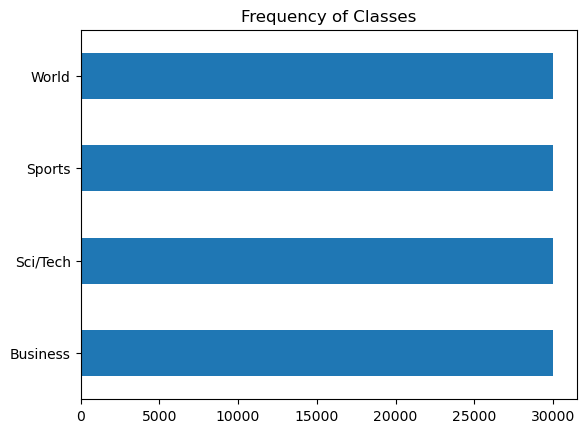

In [200]:
import matplotlib.pyplot as plt

news_df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

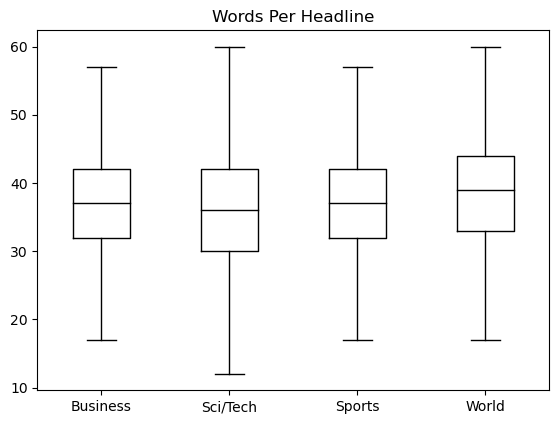

In [201]:
news_df["Words Per Headline"] = news_df["text"].str.split().apply(len)
news_df.boxplot("Words Per Headline", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [204]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [210]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [220]:
dataset = Dataset.from_pandas(news_df)
dataset

Dataset({
    features: ['text', 'label', 'clean_text', 'label_name', 'Words Per Headline'],
    num_rows: 120000
})

In [221]:
news_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

AttributeError: 'Batch' object has no attribute 'clean_text'